# Kecerdasan Buatan
### 2009106128 Muhammad Rillo Pambudi
### 2009106134 Aji Pangestu
### 2009106138 Taufiq July Kurniawan

Install Library yang akan di gunakan untuk Splitdata

In [1]:
pip install tkinter

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tkinter (from versions: none)
ERROR: No matching distribution found for tkinter

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import Library yang dibutuhkan

In [2]:
import os
import numpy as np
import splitfolders
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

# Membuat Variabel base_dir untuk menampung dataset

In [3]:
base_dir = r'E:\PRAKTIKUM\Kecerdasan Buatan\PA\uang'

Dataset yang digunakan adalah dataset Uang kertas dan Uang koin yang berjumlah 1.276 gambar dan 2 folder yaitu folder uang kertas dan uang koin

### Link Drive Dataset : https://drive.google.com/drive/folders/1WhluDZ-V2S7dSyRzt4SCLE0QbOkfCVD4?usp=sharing

# Preprocessing

In [4]:
splitfolders.ratio(
    base_dir,
    output='dataset',
    ratio=(.7, 0.1,0.2)
)

Copying files: 1276 files [00:07, 171.03 files/s]


Melakukan Split dataset yang ada di dalam variabel base_dir dan di simpan ke dalam folder baru bernama dataset

# Membuat direktori baru untuk menyiapkan dataset

Membuat variabel baru untuk menampung dataset yang akan dibagi


In [5]:
train_dir = 'dataset/train'
val_dir = 'dataset/val' 
test_dir = 'dataset/test'

os.listdir(test_dir)

['uang_kertas_indonesia', 'uang_koin_luar_negri']

Pembagian Dataset

In [6]:
from keras.preprocessing.image import ImageDataGenerator

In [7]:
#proses augmentasi gambar
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=15, 
                    brightness_range=(0.3,1.0), 
                    shear_range=0.2, 
                    zoom_range=(0.6,1.0), 
                    fill_mode='nearest', 
                    horizontal_flip=True,
                    vertical_flip=True)


In [8]:
# Data Train
train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data train
    target_size=(150,150), # mengubah resolusi seluruh gambar jadi 150*150
    batch_size=32,# untuk menentukan jumlah image yang akan dimasukkan ke dalam steps training
    class_mode='categorical'
)

# Data Validasi
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

# Data Testing
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 893 images belonging to 2 classes.
Found 127 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


##### Data Train 70 % 
##### Data Validasi 10 %
##### Data Test 20 %

# Visualisasi

In [9]:
nama_folder = ['uang_kertas_indonesia','uang_koin_luar_negri']

In [10]:
image, label = train_generator.next()

In [11]:
len(image)

32

In [12]:
print(image.shape)

(32, 150, 150, 3)


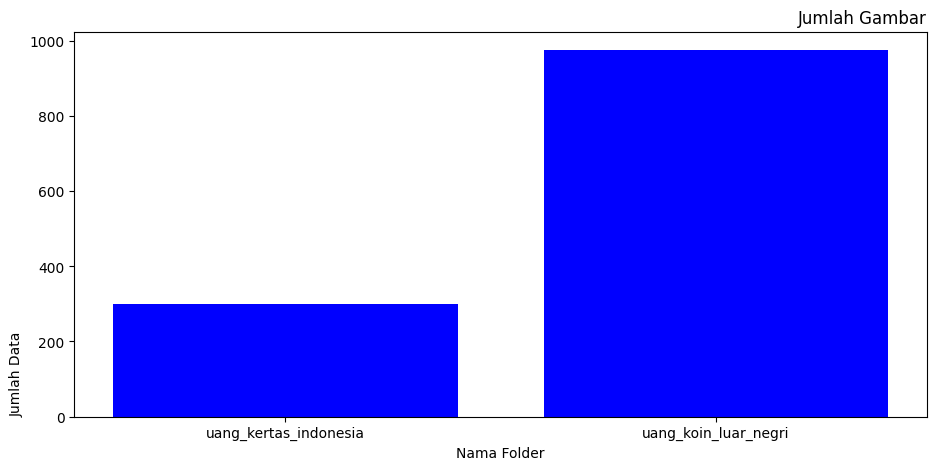

In [13]:
Jumlah_file = []
for folder in os.listdir(base_dir):
    seluruh_folder = os.listdir(os.path.join(base_dir, folder)) 
    all_file_Gambar = len(seluruh_folder)
    Jumlah_file.append(all_file_Gambar) 

x = nama_folder
y = Jumlah_file
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(5)
plt.bar(x, y, color='b')
plt.title('Jumlah Gambar', loc='right')
plt.xlabel('Nama Folder')
plt.ylabel('Jumlah Data', loc='bottom')
plt.show()

# Menampilkan Gambar dari Folder Dataset Berdasarkan Nama Folder

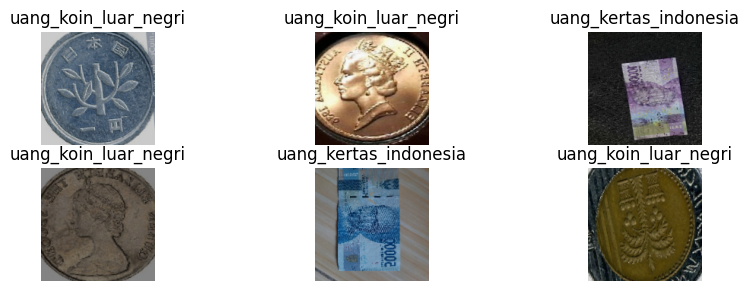

In [14]:
plt.figure(figsize=(10,5))
for i in range(6):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image[i])
  plt.title(nama_folder[np.argmax(label[i])])
  plt.axis("off")


# Modeling

model yang digunakan adalah model Sequential

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)), #input layer
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax') # output Layer
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training

In [17]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator, # untuk akurasi pengujian data
)

Epoch 1/5
28/28 [==============================] - 28s 975ms/step - loss: 0.5261 - accuracy: 0.7648 - val_loss: 0.5107 - val_accuracy: 0.7874
Epoch 2/5
28/28 [==============================] - 21s 745ms/step - loss: 0.3772 - accuracy: 0.7884 - val_loss: 0.2738 - val_accuracy: 0.8583
Epoch 3/5
28/28 [==============================] - 21s 742ms/step - loss: 0.3009 - accuracy: 0.8712 - val_loss: 0.2335 - val_accuracy: 0.9134
Epoch 4/5
28/28 [==============================] - 21s 735ms/step - loss: 0.2505 - accuracy: 0.8970 - val_loss: 0.2608 - val_accuracy: 0.9134
Epoch 5/5
28/28 [==============================] - 22s 782ms/step - loss: 0.1242 - accuracy: 0.9474 - val_loss: 0.3230 - val_accuracy: 0.9370


### Visualisasi Akurasi

+--------------------------------------------------------------------------------------------------------------+




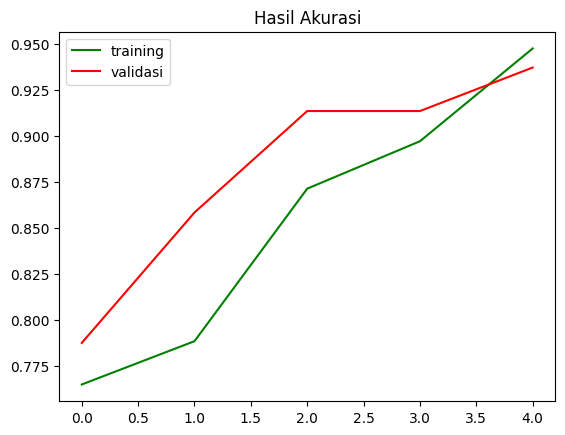

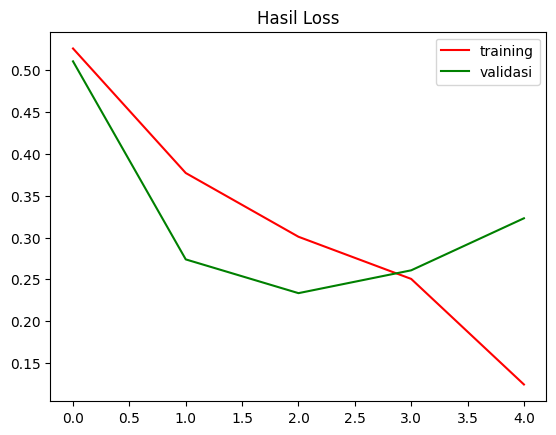

In [18]:
print("+--------------------------------------------------------------------------------------------------------------+")
print("\n")

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='training')
plt.plot(epochs, val_acc, 'r', label='validasi')
plt.title('Hasil Akurasi')
plt.legend(loc='best')
plt.show()

plt.plot(epochs, loss, 'r', label='training')
plt.plot(epochs, val_loss, 'g', label='validasi')
plt.title('Hasil Loss')
plt.legend(loc='best')
plt.show()

# Evaluate

In [19]:
evaluasi = model.evaluate(test_generator, verbose=0)

print(f'Test loss     : {evaluasi[0]}')
print(f'Test accuracy : {round(evaluasi[1])}') #dibulatkan 2 artinya 2 angka di belakang koma

Test loss     : 0.2785365581512451
Test accuracy : 1


# Hasil Prediksi Berdasarkan dari dataset

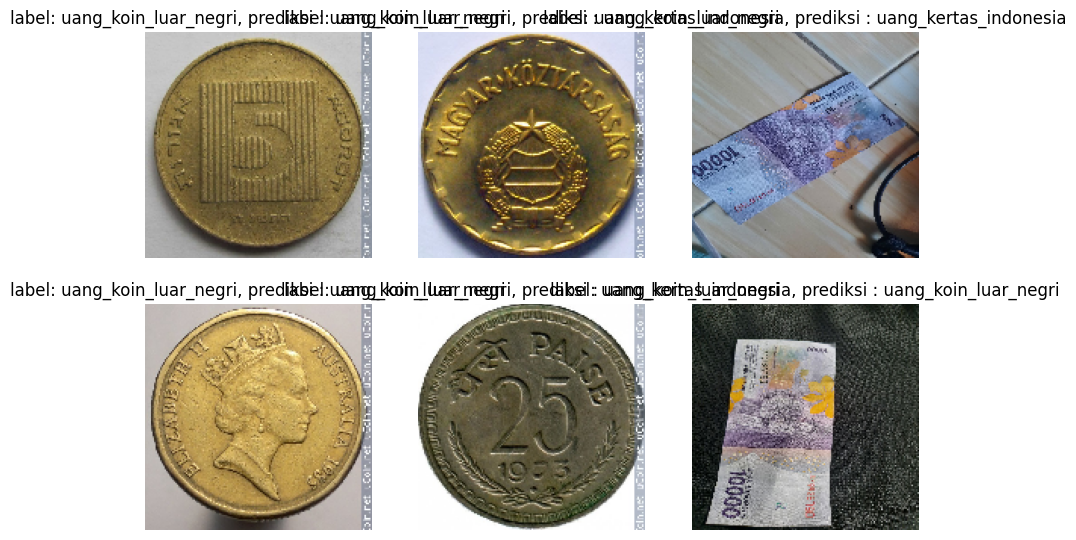

In [24]:
image ,label = next(iter(test_generator))

plt.figure(figsize=(10,10))
for i in range(6) :
    TrueLabel = nama_folder[np.argmax(label[i])]
    plt.subplot(3,3,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    plt.imshow(tf.squeeze(image[i]))
    plt.title(f'label: {TrueLabel}, prediksi : {nama_folder[y_pred]}')

# Hasil Klasifikasi dan Convusion Matrix

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Prediksi Model dari Test

In [31]:
test_pred = model.predict(test_generator)
test_predict = np.argmax(test_pred, axis=1)
test_pred

8/8 [==============================] - 3s 344ms/step


array([[3.39624440e-10, 1.00000000e+00],
       [2.32759097e-14, 1.00000000e+00],
       [1.11039656e-15, 1.00000000e+00],
       [1.90611053e-16, 1.00000000e+00],
       [3.68792355e-18, 1.00000000e+00],
       [2.03075601e-08, 1.00000000e+00],
       [2.05426289e-08, 1.00000000e+00],
       [1.25948741e-12, 1.00000000e+00],
       [2.05426289e-08, 1.00000000e+00],
       [9.99787629e-01, 2.12327039e-04],
       [2.53240723e-12, 1.00000000e+00],
       [1.08782345e-15, 1.00000000e+00],
       [6.67617295e-10, 1.00000000e+00],
       [1.11039656e-15, 1.00000000e+00],
       [1.05248532e-09, 1.00000000e+00],
       [2.02800074e-05, 9.99979734e-01],
       [6.64464892e-08, 9.99999881e-01],
       [2.16666363e-17, 1.00000000e+00],
       [4.15465744e-20, 1.00000000e+00],
       [6.56325578e-19, 1.00000000e+00],
       [1.52485148e-13, 1.00000000e+00],
       [3.42605854e-05, 9.99965787e-01],
       [2.04982271e-17, 1.00000000e+00],
       [6.65715836e-19, 1.00000000e+00],
       [9.334726

Hasil Evaluasi Model

In [34]:
print(classification_report(test_generator.labels, test_predict, target_names = nama_folder))

                       precision    recall  f1-score   support

uang_kertas_indonesia       0.05      0.03      0.04        60
 uang_koin_luar_negri       0.73      0.79      0.76       196

             accuracy                           0.61       256
            macro avg       0.39      0.41      0.40       256
         weighted avg       0.57      0.61      0.59       256



# Confusion Matrix

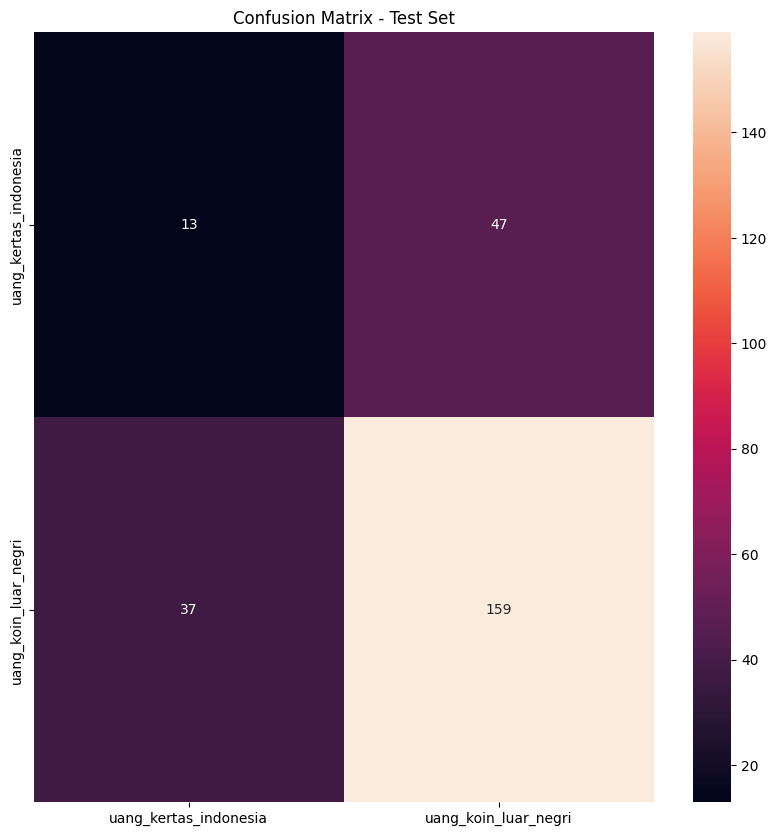

In [ ]:
plt.figure(figsize=(10, 10))
cm = confusion_matrix(test_generator.labels, y_predict)

sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_name,yticklabels=class_name)
plt.title("Confusion Matrix - Test Set")
plt.show()

# Upload Gambar untuk Hasil Klasifikasi

In [ ]:
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from tensorflow.keras.utils import load_img
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline


In [ ]:
from tkinter.filedialog import askopenfilename

filename = askopenfile()
img = keras.utils.load_img(filename, target_size=(150, 150))
imgplot = plt.imshow(img)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)


image = np.vstack([x])
classes = model.predict(image, batch_size=32)

print(filename)
if classes[0][0] == 1:
  print('uang kertas')
elif classes[0][1] == 1:
  print('uang koin')

else:
  print('Gambar tidak diketahui')

NameError: name 'askopenfile' is not defined